In [6]:
#Importing Libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '395fd97e-2f0b-412e-9a61-3dd658cd5d01',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-14T20:21:31.744Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9968}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9671, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [7]:
type(data)

dict

In [18]:
import pandas as pd

#Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2022-08-14T20:21:31.744Z,0,None,28,1,None,9968


In [20]:
#Put the data in a dataframe so it looks better for our eyes
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9671,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.912153e+07,1.912153e+07,NaN,1,NaN,NaN,None,2022-08-14T20:20:00.000Z,24335.079943,2.242805e+10,-7.0215,0.143814,-0.373917,4.903458,15.486681,12.892234,-17.974840,4.653240e+11,40.0811,5.110367e+11,None,2022-08-14T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:39:20.819424
1,1027,Ethereum,ETH,ethereum,5985,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.219643e+08,1.219643e+08,NaN,2,NaN,NaN,None,2022-08-14T20:20:00.000Z,1940.653371,1.336268e+10,-22.4974,0.462823,-1.988729,13.308343,53.232697,66.601101,-3.866210,2.366905e+11,20.3465,2.366905e+11,None,2022-08-14T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:39:20.819424
2,825,Tether,USDT,tether,38107,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.728496e+10,6.915898e+10,NaN,3,NaN,NaN,None,2022-08-14T20:20:00.000Z,1.000294,4.250728e+10,-1.8335,0.001969,-0.000145,0.015810,0.063715,0.150043,0.156387,6.730476e+10,5.7974,6.917932e+10,None,2022-08-14T20:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-14 20:39:20.819424
3,3408,USD Coin,USDC,usd-coin,5705,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.360136e+10,5.360136e+10,NaN,4,NaN,NaN,None,2022-08-14T20:20:00.000Z,1.000005,4.557831e+09,-17.0344,0.008781,0.009357,0.001113,0.000590,-0.000532,-0.011502,5.360161e+10,4.6170,5.360161e+10,None,2022-08-14T20:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-14 20:39:20.819424
4,1839,BNB,BNB,bnb,1065,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-08-14T20:20:00.000Z,319.921344,9.224576e+08,-8.2570,0.116781,-1.562792,-1.153260,32.685423,45.426986,7.146880,5.161523e+10,4.4439,6.398427e+10,None,2022-08-14T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:39:20.819424
5,2010,Cardano,ADA,cardano,546,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,6,NaN,NaN,None,2022-08-14T20:20:00.000Z,0.569361,1.177259e+09,28.4727,0.036185,1.726307,9.089665,27.394905,11.484214,1.522272,1.932073e+10,1.6609,2.562125e+10,None,2022-08-14T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:39:20.819424
6,52,XRP,XRP,xrp,793,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.913922e+10,9.998937e+10,NaN,7,NaN,NaN,None,2022-08-14T20:20:00.000Z,0.379970,7.169939e+08,14.3135,0.082065,0.423799,1.329910,13.618659,17.732064,-10.471612,1.867141e+10,1.6050,3.799696e+10,None,2022-08-14T20:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:39:20.819424
7,4687,Binance USD,BUSD,binance-usd,4672,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.772355e+10,1.772355e+10,NaN,8,NaN,NaN,None,2022-08-14T20:20:00.000Z,1.000030,5.052828e+09,-10.1526,0.005511,0.025670,-0.010162,0.110185,-0.064619,-0.204939,1.772408e+10,1.5236,1.772408e+10,None,2022-08-14T20:20:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-14 20:39:20.819424
8,5426,Solana,SOL,solana,363,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.487056e+08,5.116169e+08,NaN,9,NaN,NaN,None,2022-

In [ ]:
#Creating our function

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    #Saving the df to a csv file automatically
    
    if not os.path.isfile(r'C:\Users\jacks\OneDrive\Documents\data analyst portfolio proj\Crypto API Pull\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\jacks\OneDrive\Documents\data analyst portfolio proj\Crypto API Pull\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\jacks\OneDrive\Documents\data analyst portfolio proj\Crypto API Pull\Python Scripts\API.csv', mode = 'a', header = False)

In [72]:
#Setting up the automation loop

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [73]:
#Reading our csv file it saved

df = pd.read_csv(r'C:\Users\jacks\OneDrive\Documents\data analyst portfolio proj\Crypto API Pull\Python Scripts\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9671,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19121531.00000,19121531.00000,NaN,1,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,24316.97414,22432945776.31216,-6.67320,0.07383,-0.68803,4.58752,16.10352,11.51207,-18.39509,464977774890.35651,40.00380,510656456990.67999,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
1,1,1027,Ethereum,ETH,ethereum,5985,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121964346.81150,121964346.81150,NaN,2,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,1939.41308,13355178513.73934,-22.18610,0.36608,-2.46007,12.81365,53.89922,64.07373,-4.26062,236539249304.34848,20.35080,236539249304.35001,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
2,2,825,Tether,USDT,tether,38108,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67284962673.79201,69158976373.90933,NaN,3,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,1.00030,42406326050.16648,-2.00320,0.00299,0.00046,0.01443,0.06538,0.15239,0.13270,67305029230.65807,5.79050,69179601822.41000,NaN,2022-08-14T20:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-14 20:56:34.270033
3,3,3408,USD Coin,USDC,usd-coin,5706,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,53601363273.86992,53601363273.86992,NaN,4,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.99998,4370387994.76922,-21.83880,0.00608,0.00273,-0.00449,-0.00511,-0.02938,-0.03586,53600048957.64665,4.61140,53600048957.65000,NaN,2022-08-14T20:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-14 20:56:34.270033
4,4,1839,BNB,BNB,bnb,1065,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,319.21729,920439132.48959,-8.37790,-0.00317,-2.07095,-1.41561,33.53905,43.73879,7.51407,51501643192.24138,4.43080,63843457914.55000,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
5,5,2010,Cardano,ADA,cardano,546,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.56820,1169988733.41581,26.55590,0.08737,1.18745,7.29318,27.41075,10.63202,1.04122,19281303721.36851,1.65890,25568970053.06000,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
6,6,52,XRP,XRP,xrp,793,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49139217191.00000,99989371889.00000,NaN,7,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.37946,720562174.51717,15.37550,0.04408,0.06229,0.97058,13.98336,15.80013,-11.08993,18646258384.51083,1.60420,37945778240.70000,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
7,7,4687,Binance USD,BUSD,binance-usd,4672,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,17723549957.99926,17723549957.99926,NaN,8,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.99976,5050692080.15665,-9.59230,-0.00226,0.00139,-0.00432,-0.10346,-0.20273,0.02715,17719363676.17966,1.52450,17719363676.18000,NaN,2022-08-14T20:54:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,202

In [74]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [75]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9671,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19121531.00000,19121531.00000,NaN,1,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,24316.97414,22432945776.31216,-6.67320,0.07383,-0.68803,4.58752,16.10352,11.51207,-18.39509,464977774890.35651,40.00380,510656456990.67999,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
1,1,1027,Ethereum,ETH,ethereum,5985,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121964346.81150,121964346.81150,NaN,2,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,1939.41308,13355178513.73934,-22.18610,0.36608,-2.46007,12.81365,53.89922,64.07373,-4.26062,236539249304.34848,20.35080,236539249304.35001,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
2,2,825,Tether,USDT,tether,38108,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67284962673.79201,69158976373.90933,NaN,3,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,1.00030,42406326050.16648,-2.00320,0.00299,0.00046,0.01443,0.06538,0.15239,0.13270,67305029230.65807,5.79050,69179601822.41000,NaN,2022-08-14T20:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-14 20:56:34.270033
3,3,3408,USD Coin,USDC,usd-coin,5706,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,53601363273.86992,53601363273.86992,NaN,4,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.99998,4370387994.76922,-21.83880,0.00608,0.00273,-0.00449,-0.00511,-0.02938,-0.03586,53600048957.64665,4.61140,53600048957.65000,NaN,2022-08-14T20:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-14 20:56:34.270033
4,4,1839,BNB,BNB,bnb,1065,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,319.21729,920439132.48959,-8.37790,-0.00317,-2.07095,-1.41561,33.53905,43.73879,7.51407,51501643192.24138,4.43080,63843457914.55000,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
5,5,2010,Cardano,ADA,cardano,546,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.56820,1169988733.41581,26.55590,0.08737,1.18745,7.29318,27.41075,10.63202,1.04122,19281303721.36851,1.65890,25568970053.06000,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
6,6,52,XRP,XRP,xrp,793,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49139217191.00000,99989371889.00000,NaN,7,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.37946,720562174.51717,15.37550,0.04408,0.06229,0.97058,13.98336,15.80013,-11.08993,18646258384.51083,1.60420,37945778240.70000,NaN,2022-08-14T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-14 20:56:34.270033
7,7,4687,Binance USD,BUSD,binance-usd,4672,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,17723549957.99926,17723549957.99926,NaN,8,NaN,NaN,NaN,2022-08-14T20:54:00.000Z,0.99976,5050692080.15665,-9.59230,-0.00226,0.00139,-0.00432,-0.10346,-0.20273,0.02715,17719363676.17966,1.52450,17719363676.18000,NaN,2022-08-14T20:54:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,202

In [76]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.21733,-0.57318,4.59023,16.36757,10.92366,-18.75147
Ethereum,0.56876,-2.01550,13.47354,55.42310,62.68381,-4.38622
Tether,0.00306,-0.00174,0.01356,0.06081,0.14301,0.13120
USD Coin,-0.00408,-0.00018,0.00186,-0.02868,-0.08049,-0.03645
BNB,0.27534,-1.83782,-0.90577,33.99796,42.74262,6.96047
Cardano,0.42381,1.28513,6.82253,28.23653,9.42044,0.85902
XRP,0.11937,0.14723,1.04077,13.76598,15.21807,-11.07410
Binance USD,-0.00513,0.01426,-0.02073,-0.02008,-0.12473,-0.10961
Solana,0.78662,-3.10057,10.34060,20.15709,40.89204,-17.31182


In [77]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.21733
             quote.USD.percent_change_24h    -0.57318
             quote.USD.percent_change_7d      4.59023
             quote.USD.percent_change_30d    16.36757
             quote.USD.percent_change_60d    10.92366
             quote.USD.percent_change_90d   -18.75147
Ethereum     quote.USD.percent_change_1h      0.56876
             quote.USD.percent_change_24h    -2.01550
             quote.USD.percent_change_7d     13.47354
             quote.USD.percent_change_30d    55.42310
             quote.USD.percent_change_60d    62.68381
             quote.USD.percent_change_90d    -4.38622
Tether       quote.USD.percent_change_1h      0.00306
             quote.USD.percent_change_24h    -0.00174
             quote.USD.percent_change_7d      0.01356
             quote.USD.percent_change_30d     0.06081
             quote.USD.percent_change_60d     0.14301
             quote.USD.percent_change_90

In [78]:
type(df4)

pandas.core.series.Series

In [79]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.21733
            quote.USD.percent_change_24h  -0.57318
            quote.USD.percent_change_7d    4.59023
            quote.USD.percent_change_30d  16.36757
            quote.USD.percent_change_60d  10.92366
            quote.USD.percent_change_90d -18.75147
Ethereum    quote.USD.percent_change_1h    0.56876
            quote.USD.percent_change_24h  -2.01550
            quote.USD.percent_change_7d   13.47354
            quote.USD.percent_change_30d  55.42310
            quote.USD.percent_change_60d  62.68381
            quote.USD.percent_change_90d  -4.38622
Tether      quote.USD.percent_change_1h    0.00306
            quote.USD.percent_change_24h  -0.00174
            quote.USD.percent_change_7d    0.01356
            quote.USD.percent_change_30d   0.06081
            quote.USD.percent_change_60d   0.14301
            quote.USD.percent_change_90d   0.13120
USD Coin    quote.USD.percent_change_1h   -0.00408
            quote.USD.percent_change_24h  -0.00018
            quote.USD.percent_change_7d    0.00186
            quote.USD.percent_change_30d  -0.02868
            quote.USD.percent_change_60d  -0.08049
            quote.USD.percent_change_90d  -0.03645
BNB         quote.USD.percent_change_1h    0.27534
            quote.USD.percent_change_24h  -1.83782
            quote.USD.percent_change_7d   -0.90577
            quote.USD.percent_change_30d  33.99796
            quote.USD.percent_change_60d  42.74262
            quote.USD.percent_change_90d   6.96047
Cardano     quote.USD.percent_change_1h    0.42381
            quote.USD.percent_change_24h   1.28513
            quote.USD.percent_change_7d    6.82253
            quote.USD.percent_change_30d  28.23653
            quote.USD.percent_change_60d   9.42044
            quote.USD.percent_change_90d   0.85902
XRP         quote.USD.percent_change_1h    0.11937
            quote.USD.percent_change_24h   0.14723
            quote.USD.percent_change_7d    1.04077
            quote.USD.percent_change_30d  13.76598
            quote.USD.percent_change_60d  15.21807
            quote.USD.percent_change_90d -11.07410
Binance USD quote.USD.percent_change_1h   -0.00513
            quote.USD.percent_change_24h   0.01426
            quote.USD.percent_change_7d   -0.02073
            quote.USD.percent_change_30d  -0.02008
            quote.USD.percent_change_60d  -0.12473
            quote.USD.percent_change_90d  -0.10961
Solana      quote.USD.percent_change_1h    0.78662
            quote.USD.percent_change_24h  -3.10057
            quote.USD.percent_change_7d   10.34060
            quote.USD.percent_change_30d  20.15709
            quote.USD.percent_change_60d  40.89204
            quote.USD.percent_change_90d -17.31182
Dogecoin    quote.USD.percent_change_1h    0.34259
            quote.USD.percent_change_24h   9.73091
            quote.USD.percent_change_7d   15.90021
            quote.USD.percent_change_30d  27.85576
            quote.USD.percent_change_60d  37.90966
            quote.USD.percent_change_90d  -8.22604
Polkadot    quote.USD.percent_change_1h    0.50576
            quote.USD.percent_change_24h  -4.17307
            quote.USD.percent_change_7d    2.19971
            quote.USD.percent_change_30d  31.45955
            quote.USD.percent_change_60d  10.99723
            quote.USD.percent_change_90d -16.33358
Shiba Inu   quote.USD.percent_change_1h    0.72350
            quote.USD.percent_change_24h  32.88222
            quote.USD.percent_change_7d   39.07605
            quote.USD.percent_change_30d  54.55280
            quote.USD.percent_change_60d  98.29178
            quote.USD.percent_change_90d  38.72178
Avalanche   quote.USD.percent_change_1h    0.27724
            quote.USD.percent_change_24h  -3.16293
            quote.USD.percent_change_7d    0.93906
            quote.USD.percent_change_30d  44.76426
            quote.USD.percent_change_60d  62.44922
            quo

In [80]:
df5.count()

values    90
dtype: int64

In [81]:
Index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.21733
1,Bitcoin,quote.USD.percent_change_24h,-0.57318
2,Bitcoin,quote.USD.percent_change_7d,4.59023
3,Bitcoin,quote.USD.percent_change_30d,16.36757
4,Bitcoin,quote.USD.percent_change_60d,10.92366
5,Bitcoin,quote.USD.percent_change_90d,-18.75147
6,Ethereum,quote.USD.percent_change_1h,0.56876
7,Ethereum,quote.USD.percent_change_24h,-2.01550
8,Ethereum,quote.USD.percent_change_7d,13.47354
9,Ethereum,quote.USD.percent_change_30d,55.42310


In [82]:
#Change column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.21733
1,Bitcoin,quote.USD.percent_change_24h,-0.57318
2,Bitcoin,quote.USD.percent_change_7d,4.59023
3,Bitcoin,quote.USD.percent_change_30d,16.36757
4,Bitcoin,quote.USD.percent_change_60d,10.92366
5,Bitcoin,quote.USD.percent_change_90d,-18.75147
6,Ethereum,quote.USD.percent_change_1h,0.56876
7,Ethereum,quote.USD.percent_change_24h,-2.01550
8,Ethereum,quote.USD.percent_change_7d,13.47354
9,Ethereum,quote.USD.percent_change_30d,55.42310


In [83]:
#Rename column names so they're shorter

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.21733
1,Bitcoin,24h,-0.57318
2,Bitcoin,7d,4.59023
3,Bitcoin,30d,16.36757
4,Bitcoin,60d,10.92366
5,Bitcoin,90d,-18.75147
6,Ethereum,1h,0.56876
7,Ethereum,24h,-2.01550
8,Ethereum,7d,13.47354
9,Ethereum,30d,55.42310


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

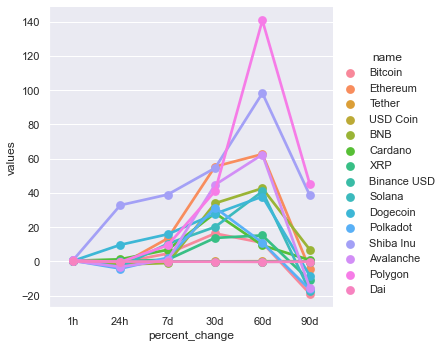

In [85]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [86]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Polygon'")
df8

,name,quote.USD.price,timestamp
13,Polygon,0.99979,2022-08-14 20:56:34.270033
28,Polygon,0.99998,2022-08-14 20:57:34.437279
43,Polygon,1.00710,2022-08-14 21:38:43.719608
58,Polygon,1.00701,2022-08-14 21:39:43.913098
72,Polygon,1.00697,2022-08-14 21:40:44.124945
87,Polygon,1.00639,2022-08-14 21:41:44.485781
102,Polygon,1.00618,2022-08-14 21:42:44.658243
117,Polygon,1.00631,2022-08-14 21:43:44.946146
132,Polygon,1.00700,2022-08-14 21:44:45.122650
147,Polygon,1.00698,2022-08-14 21:45:45.392257


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

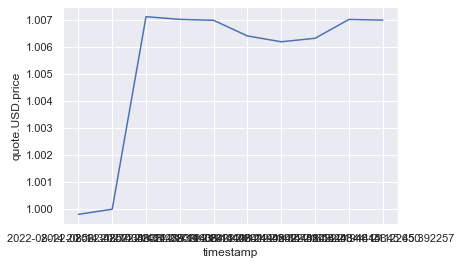

In [87]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)